In [1]:
'''
Подключение всех нужных библиотек и функций
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [2]:
# Начальное условие для генератора случайных чисел
np.random.seed(42)


'''
Процедура анализа данных
'''
def analyze(df, iris=False):
    # Первые строки таблицы
    def print_table_head(df):
        print('Первые ' + str(df.head().shape[0]) + ' строк таблицы:')
        display(df.head())
        print()

    # Вывод матрицы ковариаций
    def print_cov_matrix(X):
        # Вычисление матрицы ковариаций признаков
        def cov_matrix(X):
            return np.cov(X.T)

        print('Выборочная матрица ковариаций:')
        print(cov_matrix(X))
        print()

    # Извлечение матрицы признаков из датафрейма
    def extract_X(df):
        features = df.columns[:-1]
        X = df.loc[:, features].values

        return X

    # Построение графика
    def graph(df, title, targets):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel(df.columns[0])
        ax.set_ylabel(df.columns[1])
        ax.set_title(title)

        colors = ['r', 'g', 'b']

        for i in range(len(targets)):
            indicesToKeep = df[df.columns[-1]] == targets[i]

            ax.scatter(df.loc[indicesToKeep, df.columns[0]],
                       df.loc[indicesToKeep, df.columns[1]],
                       c=colors[i])

        if iris == False:
            targets = [
                str(int(float(target))) + '-й класс' for target in targets
            ]

        ax.legend(targets)
        ax.grid()

    # Метод PCA
    def get_PCA_df(X):
        X = StandardScaler().fit_transform(X)
        pca = PCA(n_components=2)
        PCA_X = pca.fit_transform(X)
        principalDf = pd.DataFrame(
            data=PCA_X,
            columns=['1-я главная компонента', '2-я главная компонента'])

        target_name = df.columns[-1]
        finalDf = pd.concat([principalDf, df[target_name]], axis=1)

        return finalDf

    target_name = df.columns[-1]
    targets = np.unique(df.loc[:, target_name].values)

    print('*** Исходные данные ***\n\n')

    X = extract_X(df)
    print_table_head(df)
    print_cov_matrix(X)

    print('\n*** Данные после метода PCA ***\n\n')

    PCA_df = get_PCA_df(X)
    PCA_X = extract_X(PCA_df)
    print_table_head(PCA_df)
    print_cov_matrix(PCA_X)

    graph(PCA_df, 'График PCA-данных', targets)

*** Исходные данные ***


Первые 5 строк таблицы:


<ipython-input-3-0c030d90305b>:10: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean=mean, cov=sigma, size=size)


,1-ый признак,2-ой признак,3-ий признак,4-ый признак,Класс
0,-0.614131,0.200560,0.015251,-1.170058,1.0
1,0.000016,1.242109,1.484203,0.726296,1.0
2,0.978808,1.941024,1.903241,0.865458,1.0
3,-2.084482,-0.220456,0.643571,0.507598,1.0
4,1.283508,2.644657,3.005806,2.366955,1.0



Выборочная матрица ковариаций:
[[11.31474248 12.47102941 12.39275715  3.67257064]
 [12.47102941 14.30597636 14.75006489  5.45814452]
 [12.39275715 14.75006489 15.72037514  6.98170295]
 [ 3.67257064  5.45814452  6.98170295  6.67115323]]


*** Данные после метода PCA ***


Первые 5 строк таблицы:


,1-я главная компонента,2-я главная компонента,Класс
0,-1.298016,0.076698,1.0
1,-0.571939,-0.431672,1.0
2,-0.244075,-0.317596,1.0
3,-1.247839,-0.699513,1.0
4,0.277425,-0.749551,1.0



Выборочная матрица ковариаций:
[[ 3.33028839e+00 -5.69003192e-17]
 [-5.69003192e-17  6.52959866e-01]]



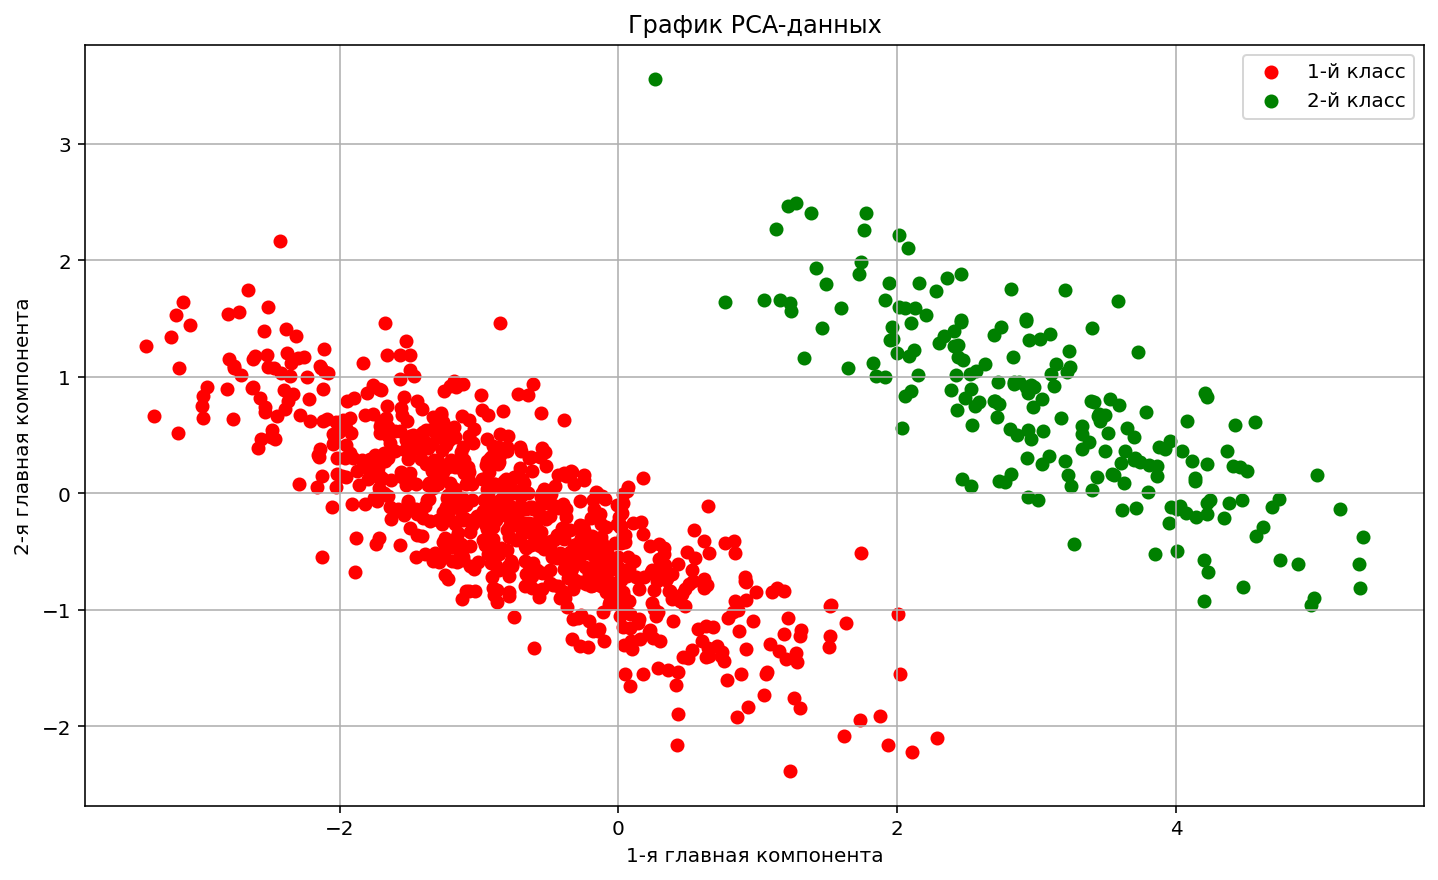

In [3]:
'''
Модельные данные
'''


'''
Генерация случайной выборки из многомерного нормального распределения
'''
def gen_N(mean, sigma, size):
    return np.random.multivariate_normal(mean=mean, cov=sigma, size=size)


sigma = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
mu1 = np.array([0, 1, 1, 0])
mu2 = np.array([8, 10, 10, 2])
n1 = 800
n2 = 200

X1 = gen_N(mu1, sigma, n1)
y1 = np.full((n1, 1), 1)
Xy1 = np.append(X1, y1, axis=1)
X2 = gen_N(mu2, sigma, n2)
y2 = np.full((n2, 1), 2)
Xy2 = np.append(X2, y2, axis=1)
Xy = np.append(Xy1, Xy2, axis=0)

df = pd.DataFrame(data=Xy,
                  columns=[
                      '1-ый признак', '2-ой признак', '3-ий признак',
                      '4-ый признак', 'Класс'
                  ])
analyze(df)

*** Исходные данные ***


Первые 5 строк таблицы:


,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Вид
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Выборочная матрица ковариаций:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


*** Данные после метода PCA ***


Первые 5 строк таблицы:


,1-я главная компонента,2-я главная компонента,Вид
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa



Выборочная матрица ковариаций:
[[2.93035378e+00 8.01141496e-17]
 [8.01141496e-17 9.27403622e-01]]



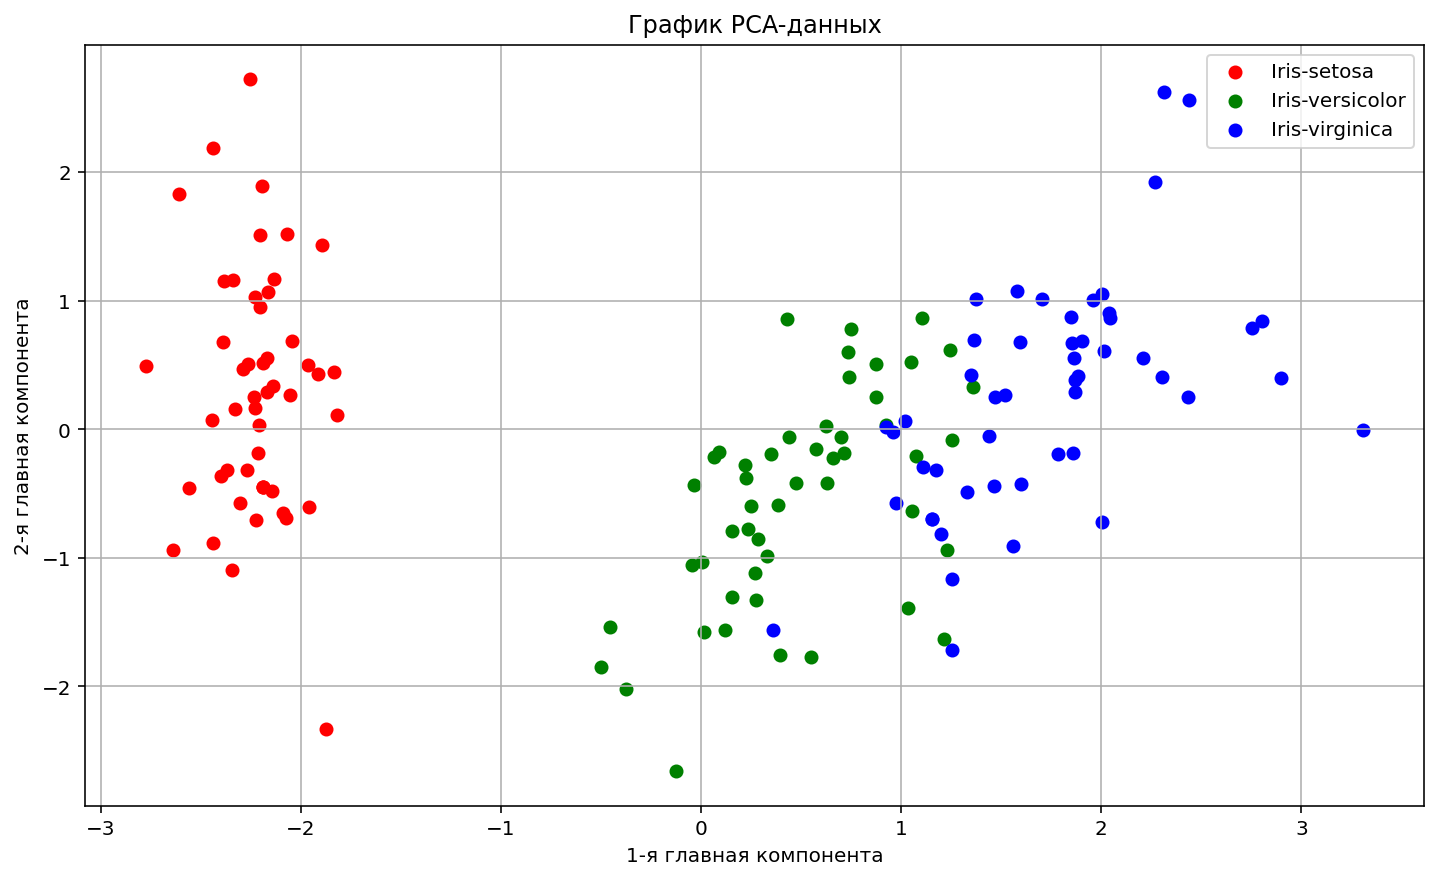

In [4]:
'''
iris
'''

iris_df = pd.read_csv('iris.data',
                      names=[
                          'Длина чашелистика', 'Ширина чашелистика',
                          'Длина лепестка', 'Ширина лепестка', 'Вид'
                      ])
analyze(iris_df, iris=True)

*** Исходные данные ***


Первые 5 строк таблицы:


,1-й признак,2-й признак,3-й признак,4-й признак,5-й признак,6-й признак,7-й признак,8-й признак,9-й признак,10-й признак,...,16-й признак,17-й признак,18-й признак,19-й признак,20-й признак,21-й признак,22-й признак,23-й признак,24-й признак,Класс
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2



Выборочная матрица ковариаций:
[[ 1.58165265e+00 -1.09212312e+00  2.61796797e-01 -1.51876577e+00
   4.42857858e-01  1.61593594e-01  3.85245245e-02 -5.86236236e-02
  -4.26086086e-02  8.54812813e-01  4.15665666e-02  5.52162162e-02
  -6.44144144e-03  4.09329329e-02 -6.35535536e-03 -3.70550551e-02
   2.45935936e-02  4.47057057e-02 -1.26696697e-02 -4.43273273e-02
   7.36726727e-02 -8.70270270e-03 -2.04204204e-02  3.35235235e-02]
 [-1.09212312e+00  1.45415006e+02 -1.00814314e+00  2.12847815e+02
   9.08093093e-01  8.36084084e-01  1.26280280e-01  4.53418418e-01
   3.84957558e+00 -4.95699499e+00 -4.66991992e-01 -7.85995996e-02
  -1.04069069e-01  9.75163163e-01 -3.14725726e-01 -5.61863864e-01
   5.31522523e-01  3.50140140e-02  7.10480480e-02 -2.97934935e-01
  -4.10249249e-01 -7.79439439e-02 -8.74474474e-01  3.20430430e-01]
 [ 2.61796797e-01 -1.00814314e+00  1.17314815e+00 -1.84033534e+00
   6.68418418e-02  1.80900901e-01  3.23423423e-02  7.55505506e-02
  -6.11711712e-02  1.81224224e+00  9.32182

,1-я главная компонента,2-я главная компонента,Класс
0,0.009839,-2.855372,1
1,0.268209,0.974836,2
2,-2.182523,-1.935961,1
3,1.501634,1.342640,1
4,1.231470,-0.314080,2



Выборочная матрица ковариаций:
[[2.52080990e+00 2.84501596e-17]
 [2.84501596e-17 2.12359742e+00]]



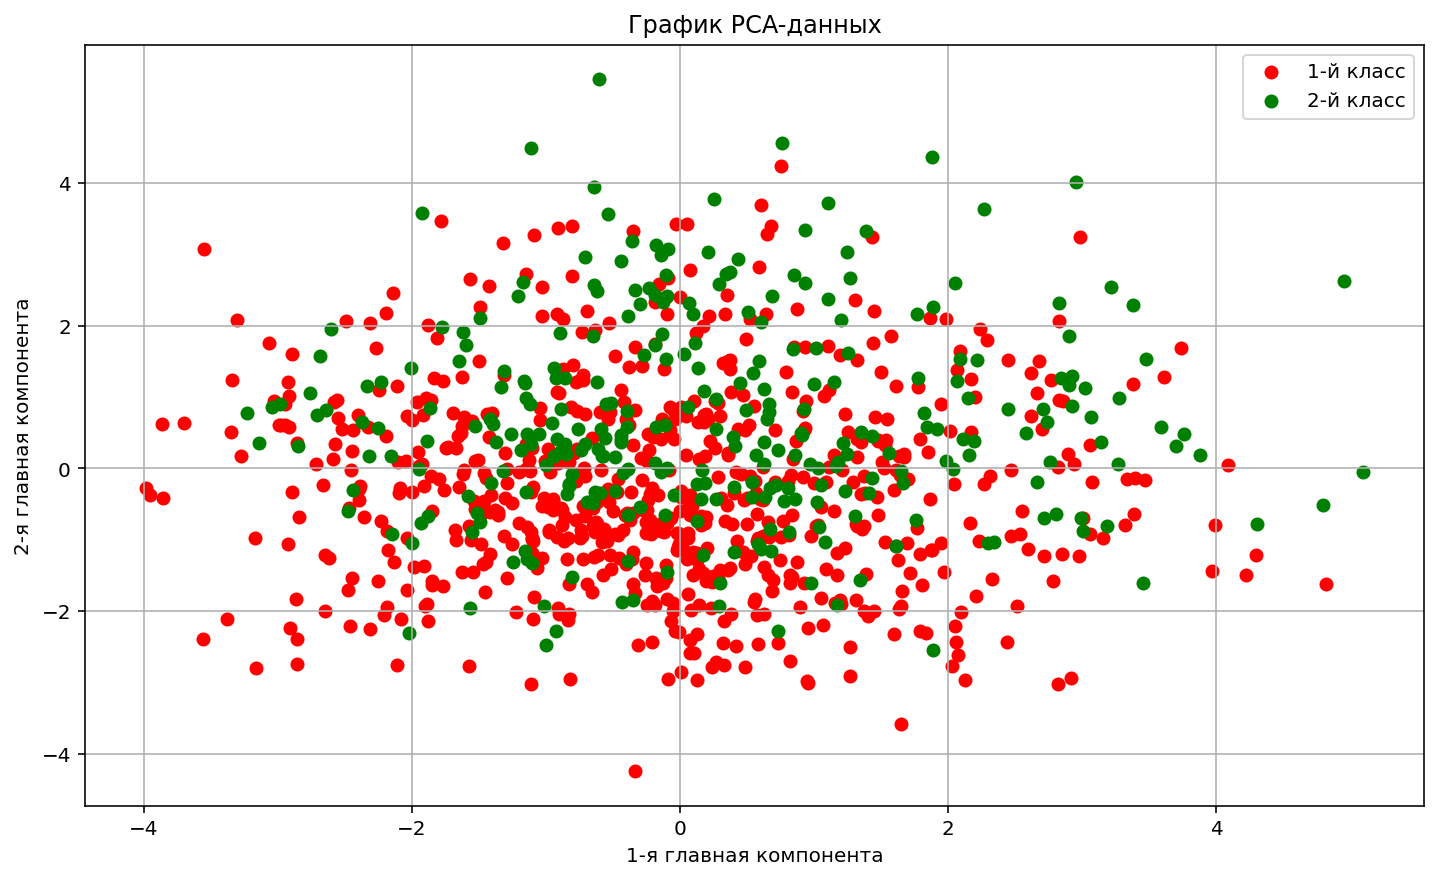

In [5]:
'''
german
'''


'''
Получение и считывание данных из файла в двумерный список int'ов
'''
def parse_file(filename):
    arr = []

    with open(filename) as file:
        for line in file:
            arr.append(list(map(int, line.strip().split())))

    return arr


arr = parse_file('german.data-numeric')
p = len(arr[0]) - 1
columns = [str(i + 1) + '-й признак' for i in range(p)]
columns.append('Класс')

german_df = pd.DataFrame(data=arr, columns=columns)
analyze(german_df)